# Visualizing Ford GoBike System Data
## by ARWA ALHUMAIDI

## Investigation Overview

> In this investigation, I wanted to look at the features of bike trips for two type of users in Ford GoBike System Data and compare between them.

## Dataset Overview

> Provide a brief overview of the dataset to be presented here.
This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. It collected from January 2018 to December 2018 and it contains approximately 1863721 bike rides.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
clean_2018 = pd.read_csv('clean_2018.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Bike Trips for Per Month in 2018

October is the most month of bike rides while the December is lessest month. That means, in the fall and summer seasons the requests on bike rides become so high, but in the winter season because the weather so bad and cold the requests on bike rides become so low.

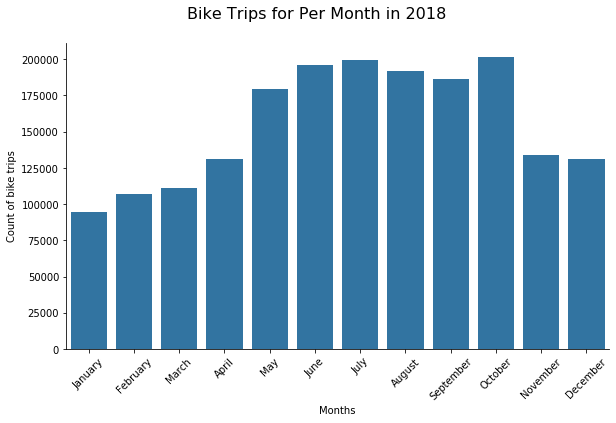

In [5]:
#create plot to bike trips for per month in 2018
base_color =sb.color_palette()[0]
g = sb.catplot(data=clean_2018, x='start_month', kind='count',
               color=base_color, aspect=1.7)
g.set_axis_labels('Months', 'Count of bike trips')
g.fig.suptitle('Bike Trips for Per Month in 2018', y=1.07, fontsize=16)
g.set_xticklabels(rotation=45);

## Bike Trips for Per Day in Week

Tuesday, Thursday and Wednesday are the highest days in number of bike trips, while Satrurday and Sunday are lowest days in number of bike trips. That means, the requests on bike rides in weekday more than weekend.

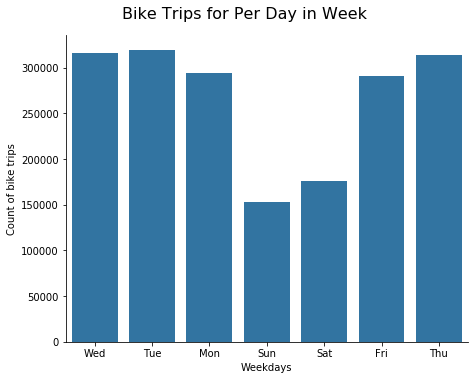

In [7]:
#Create plot to bike trips for per day in week
g = sb.catplot(data=clean_2018, x='start_weekday', kind='count',
               color=base_color, aspect=1.3)
g.set_axis_labels('Weekdays', 'Count of bike trips')
g.fig.suptitle('Bike Trips for Per Day in Week', y=1.05, fontsize=16);

## Bike Trips for Per Hour in Day

Most bike trips at 7-9 am in the monrning and 4-6 pm in the evening, and in this times, most of people are go to school and work and back home.

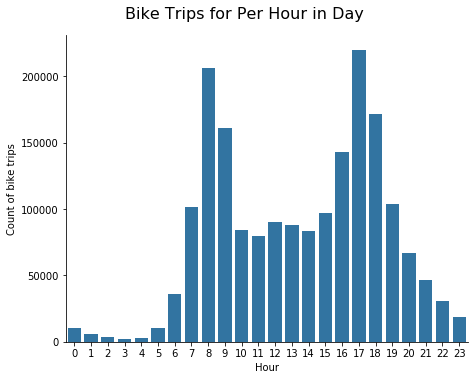

In [8]:
#Create plot to bike trips for per hour in day
g = sb.catplot(data=clean_2018, x='start_hour', kind='count',
               color=base_color, aspect=1.3)
g.set_axis_labels('Hour', 'Count of bike trips')
g.fig.suptitle('Bike Trips for Per Hour in Day', y=1.05, fontsize=16);

## Bike Trips Duration in Minute

Most bike trips take 5 to 12.5 minutes

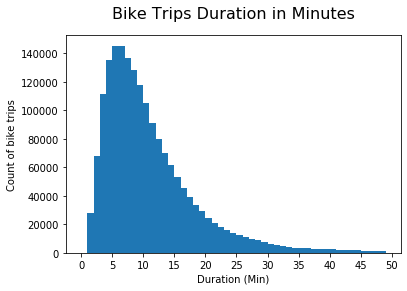

In [10]:
#Create histogram to count of bike trips duration in minutes
ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
bin_edges = np.arange(0,50, 1)
plt.hist(data=clean_2018, x='duration_min', bins=bin_edges)
plt.title('Bike Trips Duration in Minutes', y=1.05, fontsize=16)
plt.xlabel('Duration (Min)')
plt.ylabel('Count of bike trips')
plt.xticks(ticks);

## User Types

Most users are subscribers (85% subscriber). on the other hand, there are just 15% of users are customers.

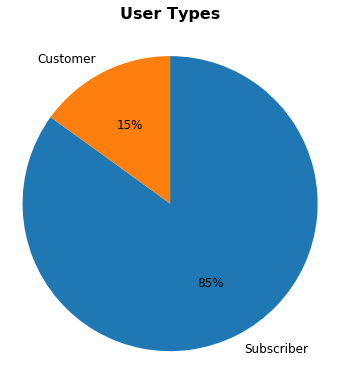

In [11]:
#Create pie chart to count the percentage of user types
sorted_counts = clean_2018['user_type'].value_counts()
fig=plt.figure(figsize=(6,6))
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct = lambda p:f'{p:.0f}%',
        textprops={'fontsize': 12});
plt.title('User Types', y=1.05, fontsize=16, fontweight='semibold')
plt.axis('square');

## Bike Trips Monthly Per User Type

October is most month of bike rides for subscribers while the July is most month of bike rides to customers. The subscribers probably residents of the area while the costumers are tourists. For per type of users, the winter season the requests on bike rides become so low, but in the fall and summer seasons, the requests on bike rides become so high.

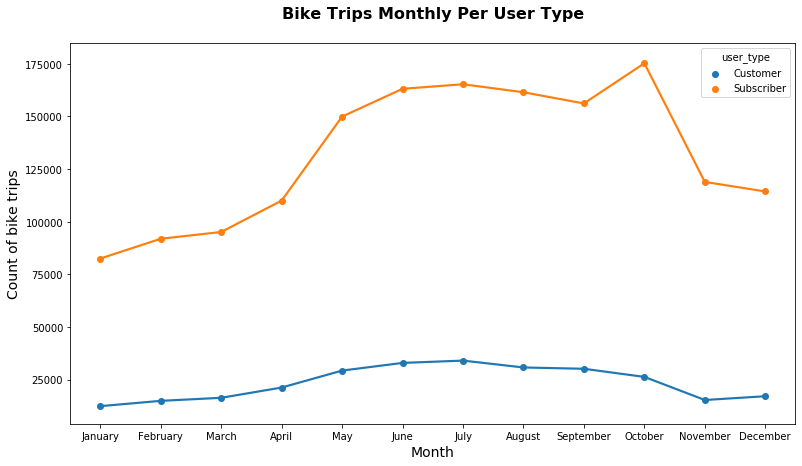

In [12]:
#Create plot to count of bike trips monthly per user type
months = ['January', 'February', 'March', 'April', 'May', 'June','July',
          'August', 'September', 'October', 'November', 'December']
type_user_monthly = clean_2018.groupby(['start_month', 'user_type']).size().reset_index()
plt.figure(figsize=(13, 7))
ax =sb.pointplot(data=type_user_monthly, x='start_month', hue='user_type',
                 y=0, scale=0.8, order=months)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count of bike trips', fontsize=14)
plt.title('Bike Trips Monthly Per User Type', y=1.05,
          fontsize=16, fontweight='semibold');


## Bike Trips of weekdays Per User Type

The costumers have high of bike rides on weekend and low of bike rides on weekdays. In the other hand, the subscribers have high of bike rides on weekdays and low of bike rides on weekend. This also explain the subscribers are residents while the costumers are tourists.

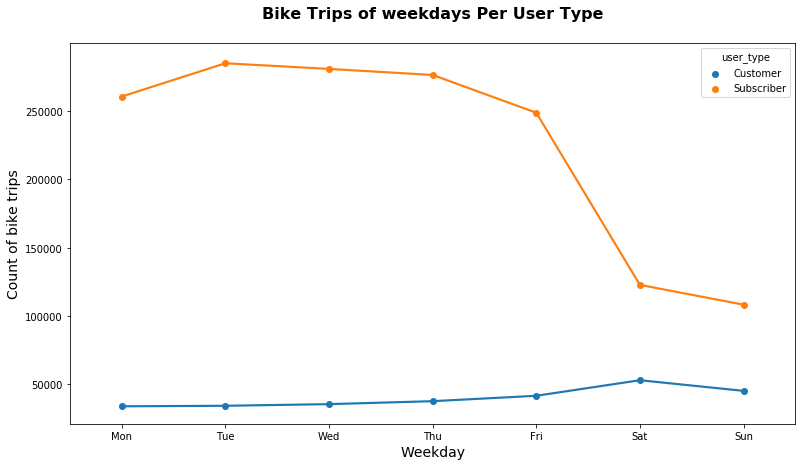

In [13]:
#Create plot to count bike trips of weekdays per user type
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']
type_user_monthly = clean_2018.groupby(['start_weekday', 'user_type']).size().reset_index()
plt.figure(figsize=(13, 7))
ax =sb.pointplot(data=type_user_monthly, x='start_weekday', hue='user_type',
                 y=0, scale=0.8, order=weekdays)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Count of bike trips', fontsize=14)
plt.title('Bike Trips of weekdays Per User Type', y=1.05, fontsize=16, fontweight='bold');

## Trip Duration (Min) Per User Type

The customer's bike trips are longer than the subscriber's bike trips. This is due to subscribers are using bikes for go to work or school while the customers using bikes to take trips around the area and for tourism.

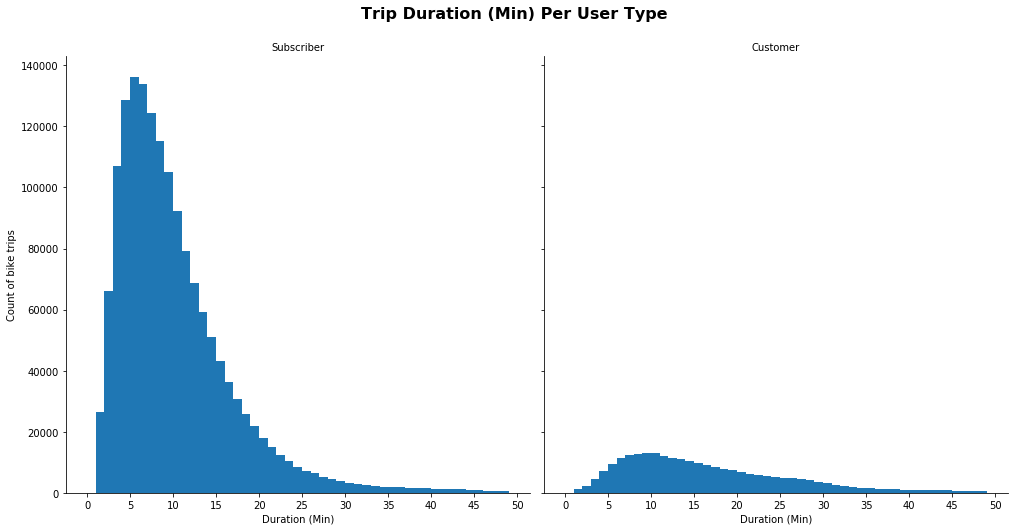

In [14]:
#Create plot to count bike trips of customers vs bike trips of subscribers by duration
g = sb.FacetGrid(clean_2018, col='user_type', margin_titles=True, size=7)
ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
bin_edges = np.arange(0, 50, 1)
g.map(plt.hist, 'duration_min', color=base_color, bins=bin_edges)
g.set_axis_labels('Duration (Min)', 'Count of bike trips')
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip Duration (Min) Per User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xticks(ticks);

## User Type of Bikes for Per Hour During Weekdays

#### Summarize all the points that we observted before

<b>Subscribers:</b> They are take bike trips most of the time on weekdays at 7-9 am and 4-6 pm.

<b>Customers:</b> They are take bike trips most of the time on weekend from 10am to 4pm. However, there are some bike trips for costumers on weekdays at 7-9 am and 4-6 pm.

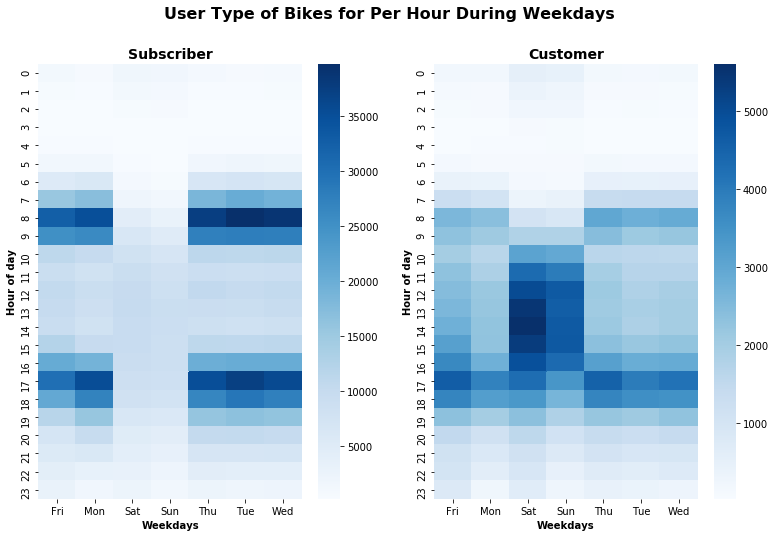

In [15]:
#Create heatmaps for customers and subscribers for per hour during weekdays

plt.figure(figsize=(13,8))

#Subscribers heatmap
plt.subplot(1, 2, 1)
subscribers = clean_2018.query('user_type == "Subscriber"').groupby(['start_hour', 'start_weekday'])['bike_id'].size().reset_index()
subscribers = subscribers.pivot('start_hour', 'start_weekday', 'bike_id')
sb.heatmap(subscribers, cmap = 'Blues')
plt.ylabel('Hour of day', fontweight='bold')
plt.xlabel('Weekdays', fontweight='bold')
plt.title("Subscriber",fontweight='bold', fontsize=14)


#Customers heatmap
plt.subplot(1, 2, 2)
customers = clean_2018.query('user_type == "Customer"').groupby(['start_hour', 'start_weekday'])['bike_id'].size().reset_index()
customers = customers.pivot('start_hour', 'start_weekday', 'bike_id')
sb.heatmap(customers, cmap = 'Blues')
plt.ylabel('Hour of day', fontweight='bold')
plt.xlabel('Weekdays', fontweight='bold')
plt.title('Customer', fontweight='bold', fontsize=14)
plt.suptitle('User Type of Bikes for Per Hour During Weekdays',
             fontsize=16, fontweight='bold');